# Breast Cancer Dataset Analysis

The Breast Cancer dataset is a classic dataset that's commonly used for binary classification tasks. It contains 569 samples of malignant and benign tumor cells, with 30 features describing various characteristics of the cell nuclei, such as radius, texture, and smoothness.

The goal of this analysis is to explore whether the K-Means Algorithm naturally clusters the data provided by the Breast Cancer dataset into groups that align with the known classes (benign and malignant).

## Attribution

The Breast Cancer Dataset used in this analysis is provided by the University of Wisconsin–Madison and was originally compiled by Dr. William H. Wolberg.

>W.N. Street, W.H. Wolberg and O.L. Mangasarian. 
Nuclear feature extraction for breast tumor diagnosis. 
IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

---

On a personal note, this analysis is dedicated to all those who have been affected by breast cancer. May this work contribute, in some small way, to the ongoing fight against this disease. Moreover, I would also like to thank the open-source community for providing tools that enable such important work to be done by professionals in the medical research field.

If you would like to be a part of the fight against this disease, feel free to donate to any of the following organizations:
- [Breast Cancer Research Foundation (BCRF)](https://www.bcrf.org/)
- [American Cancer Society](https://www.cancer.org/)
- [World Health Organization (WHO)](https://www.who.int/)

# Import Libraries

The first step in this analysis is to import all of the libraries that I'll be using for this project.

In [82]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, classification_report, confusion_matrix, davies_bouldin_score, silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import Data

The next step is to import the dataset that I'll be using throughout this analysis; The "Breast Cancer Dataset." This dataset is included with SciKit-Learn and it comes from the work of Dr. William H. Wolberg.

In [83]:
breast_cancer = load_breast_cancer()

In [84]:
display(breast_cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [85]:
feature_names = breast_cancer.feature_names

In [86]:
target_names = breast_cancer.target_names

In [87]:
X = breast_cancer.data
y = breast_cancer.target

display(X)
display(y)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [88]:
feature_df = pd.DataFrame(X)
feature_df.columns = feature_names
display(feature_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [89]:
target_df = pd.DataFrame(y)
target_df.columns = ['target']
display(target_df)

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [90]:
df = feature_df.join(target_df)
display(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Exploratory Data Analysis (EDA)

The next section of my analysis is the **Exploratory Data Analysis (EDA)** section. The Exploratory Data Analysis (EDA) section aims to uncover the distribution of the classes and the underlying patterns within the dataset. This analysis is divided into two main sub-sections: **Descriptive Statistics** and **Data Visualization**. The Descriptive Statistics sub-section provides a summary of key statistical measures to understand the central tendencies and variability of the features. Meanwhile, the Data Visualization subsection employs various graphical techniques to illustrate feature distributions, class balances, and relationships between variables. Together, these analyses reveal unexpected patterns and trends, highlighting the complexities of the data and informing further modeling decisions.

## Descriptive Statistics

The `.info()` method provides me with very important information, such as the shape and size of the DataFrame, the data type of each column, if there are any null values in the dataset, and some other minor information.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The `.describe()` method provides an invaluable statistical summary of the entire DataFrame, excluding categorical information (although this can be changed, this DataFrame doesn't contain any categorical data.). This step ensures that I'm able to understand the data's intricacies and nuances without having to perform extensive analyses on all the features of the DataFrame. This is very useful when dealing with visualization, which is the next section.

In [92]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


The `.corr()` method creates a new DataFrame containing all of the variables and their respective correlations (positive and negative), as well as the correlation strength of each variable pair.

In [93]:
df_corr = df.corr()

I then sort these values, from highest correlation to lowest correlation to the target.

In [94]:
df_corr[['target']].sort_values(by='target', ascending=False)

,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


The `df[['target']].value_counts()` step allows me to see if there's a balance or an imbalance in the distribution of the class. There are approximately 1.683 times as many benign samples as there are malignant samples.

In [95]:
df[['target']].value_counts()

target
1         357
0         212
Name: count, dtype: int64

## Data Visualization

The Data Visualization stage allows me to explore the data through graphs and charts, helping me gain a deeper understanding of the underlying patterns and processes.

### Box Plot

The first plot I created was a Box Plot to illustrate the distribution of tumor classes in the dataset. This plot provides valuable insights into the data. From the samples available, it appears that malignant tumors are less common compared to benign tumors, as the majority of the samples are classified as benign.

In [96]:
df_for_visualization = df.copy()

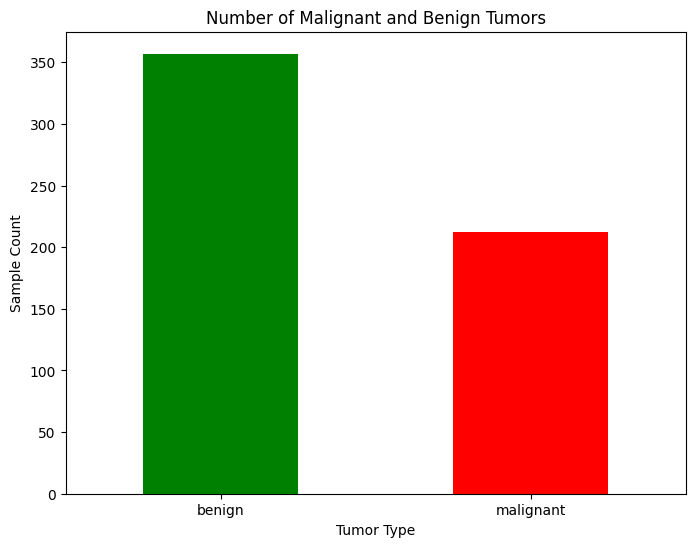

In [97]:
df_for_visualization['target'] = df_for_visualization['target'].map({0: 'malignant', 1: 'benign'})

counts = df_for_visualization['target'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Tumor Type')
plt.ylabel('Sample Count')
plt.title('Number of Malignant and Benign Tumors')
plt.xticks(rotation=0)
plt.show()

### Correlation Heat Map

The second plot I created was a Correlation Heat Map. This visual tool helps to clearly display the relationships between different variables in the dataset. By using color gradients, the heat map shows how strongly each pair of variables is correlated with one another. This allows us to quickly identify patterns and potential connections between variables, making it easier to understand the underlying structure of the data.

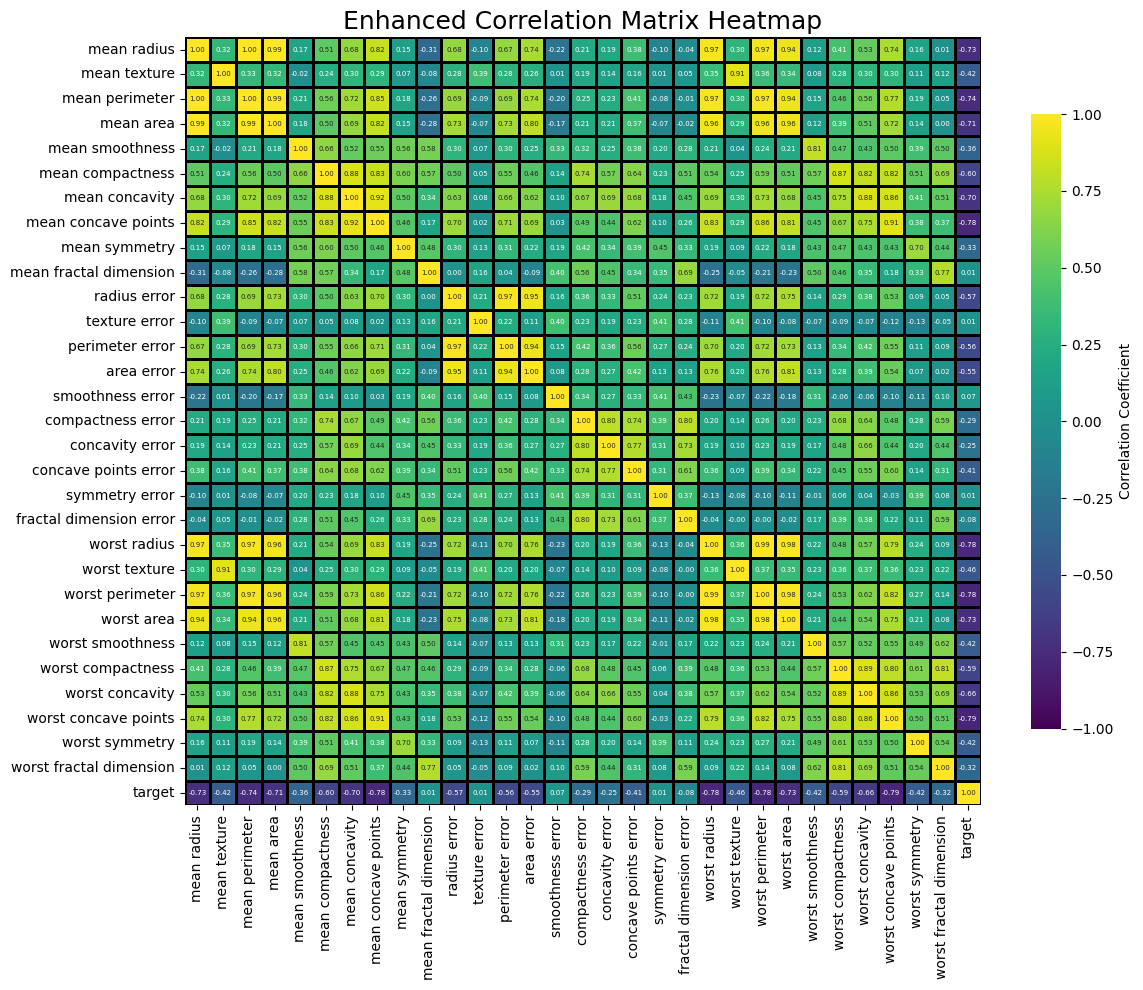

In [98]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_corr, annot=True, cmap='viridis', fmt='.2f', 
            vmin=-1, vmax=1, linewidths=0.8, linecolor='black', 
            cbar_kws={'shrink': .8, 'label': 'Correlation Coefficient'},
            annot_kws={'size': 5})

plt.title('Enhanced Correlation Matrix Heatmap', size=18)
plt.tight_layout()
plt.show()

### Comparison of the Mean Area of Tumor Samples for Each Class

The third plot I created was more focused on analyzing specific variables. Given the many variables in the dataset, I aimed to identify one that effectively highlights the differences between the two tumor classes. My hypothesis was that each class would show distinct patterns in different variables. I observed a notable difference in the 'Mean Area' variable: malignant tumors had a significantly larger mean area compared to benign tumors, indicating a clear distinction between the two classes.

The areas in the plot are meant to represent their size proportions and do not represent the actual sizes of the tumors.

/var/folders/09/_3cvgdbn0k931thmhy93h3_r0000gn/T/ipykernel_36555/3762586692.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value1 = areas[0]
/var/folders/09/_3cvgdbn0k931thmhy93h3_r0000gn/T/ipykernel_36555/3762586692.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value2 = areas[1]


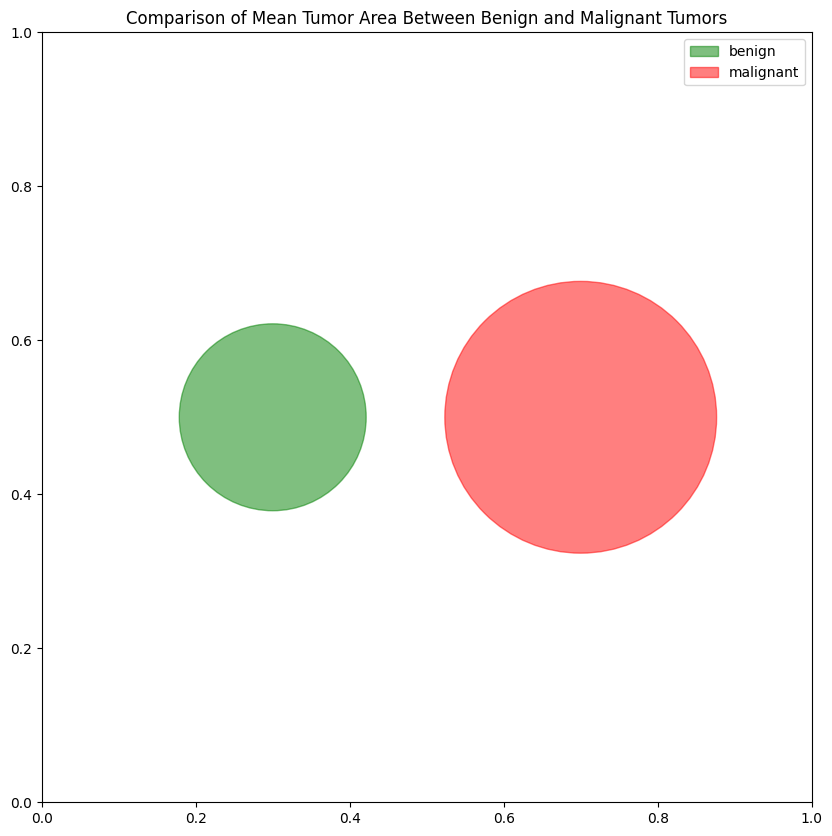

In [99]:
areas = df_for_visualization.groupby('target')['mean area'].mean()

value1 = areas[0]
value2 = areas[1]

radius1 = np.sqrt(value1 / np.pi)
radius2 = np.sqrt(value2 / np.pi)

scaling_factor = 0.01

radius1 *= scaling_factor
radius2 *= scaling_factor

fig, ax = plt.subplots(figsize=(10, 10))

circle1 = patches.Circle((0.3, 0.5), radius1, color='green', alpha=0.5, label=df_for_visualization['target'].unique()[1])
circle2 = patches.Circle((0.7, 0.5), radius2, color='red', alpha=0.5, label=df_for_visualization['target'].unique()[0])

ax.add_patch(circle1)
ax.add_patch(circle2)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

plt.legend()
plt.title('Comparison of Mean Tumor Area Between Benign and Malignant Tumors')
plt.show()

# Statistical Modeling

We finally come to the **Statistical Modeling** section. The purpose of the K-Means Clustering algorithm is to partition a dataset into distinct groups (clusters) based on feature similarity, minimizing the variance within each cluster. It helps identify patterns and group similar data points together for further analysis. This section aims to cluster the available data into two distinct segments: "benign" and "malignant." The assumption is that the dataset naturally divides into these two groups based on its features, aligning with the actual classes present in the data. By selecting K=2, I test whether K-Means can identify these two distinct groups within the dataset. Although K-Means clusters do not always perfectly match the actual classes, setting K=2 helps explore if the data naturally forms two similar clusters. Sometimes, the features are so distinct that K-Means closely aligns with the real classes, but this is not guaranteed. Comparing the resulting clusters with the actual labels (benign vs. malignant) provides insight into how well the features differentiate between these two types. If the clusters do not align well with the actual classes, it may suggest that the features are not ideally suited for this clustering task, or that the problem is more complex than a simple binary division.

## Data Pre-Processing

The first step in this stage is the standardization of the data. Clustering algorithms, especially those that rely on distance measures like K-Means, perform best when the data is standardized to have a mean of 0 and a standard deviation of 1. This standardization ensures that each feature contributes equally to the distance calculations, avoiding biases due to differences in scales. Standardization of data is crucial before clustering because it ensures that all features contribute equally to the distance metrics used in the clustering algorithm, preventing features with larger scales from disproportionately influencing the results.

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## GridSearchCV

To find the optimal parameters for my K-Means algorithm, I used GridSearchCV. This tool systematically searches through a range of specified parameter values to determine the best settings for the model. By using GridSearchCV, I aimed to ensure that the K-Means model performs at its best, which allows for a more accurate assessment of its performance.

In [101]:
"""
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [100, 200, 300, 400, 500]
}

grid_search = GridSearchCV(KMeans(), param_grid, cv=5, verbose=1)

grid_search.fit(X_scaled)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

y_pred = grid_search.best_estimator_.predict(X_scaled)

kmeans_ami = adjusted_mutual_info_score(breast_cancer.target, y_pred)
kmeans_ari = adjusted_rand_score(breast_cancer.target, y_pred)
kmeans_davies_bouldin = davies_bouldin_score(breast_cancer.data, y_pred)
kmeans_silhouette = silhouette_score(X_scaled, y_pred)

print(f'K-Means Adjusted Mutual Information (AMI) Score: {round(kmeans_ami, 4)}')
print(f'K-Means Adjusted Rand Index (ARI) Score: {round(kmeans_ari, 4)}')
print(f'K-Means Davies-Bouldin Score: {round(kmeans_davies_bouldin, 4)}')
print(f'K-Means Silhouette Score: {round(kmeans_silhouette, 4)}')
"""

'\nparam_grid = {\n    \'init\': [\'k-means++\', \'random\'],\n    \'n_init\': [10, 20, 30],\n    \'max_iter\': [100, 200, 300, 400, 500]\n}\n\ngrid_search = GridSearchCV(KMeans(), param_grid, cv=5, verbose=1)\n\ngrid_search.fit(X_scaled)\n\nprint(f"Best parameters found: {grid_search.best_params_}")\nprint(f"Best score: {grid_search.best_score_}")\n\ny_pred = grid_search.best_estimator_.predict(X_scaled)\n\nkmeans_ami = adjusted_mutual_info_score(breast_cancer.target, y_pred)\nkmeans_ari = adjusted_rand_score(breast_cancer.target, y_pred)\nkmeans_davies_bouldin = davies_bouldin_score(breast_cancer.data, y_pred)\nkmeans_silhouette = silhouette_score(X_scaled, y_pred)\n\nprint(f\'K-Means Adjusted Mutual Information (AMI) Score: {round(kmeans_ami, 4)}\')\nprint(f\'K-Means Adjusted Rand Index (ARI) Score: {round(kmeans_ari, 4)}\')\nprint(f\'K-Means Davies-Bouldin Score: {round(kmeans_davies_bouldin, 4)}\')\nprint(f\'K-Means Silhouette Score: {round(kmeans_silhouette, 4)}\')\n'

## Creating the Model

The second step in the **Statistical Modeling** process is to create an instance of the K-Means algorithm. Next, I specify the number of clusters, K, which in this case is set to 2 to match the binary nature of the target variable (malignant and benign tumors). By choosing K=2, I aim to divide the data into two distinct clusters that correspond to these two classes. I then fit the model to the dataset and analyze the results to evaluate how well the clusters represent the separation between the two tumor types.

In [102]:
kmeans = KMeans(n_clusters=2, init='random', n_init=20, max_iter=400, random_state=0)
kmeans = kmeans.fit(X_scaled)

### K-Means Labels

K-Means is an unsupervised learning algorithm used for clustering data based on feature similarity, without relying on pre-defined labels. It groups data points into clusters where each point is assigned to the cluster most similar to it in terms of its features. The resulting labels from K-Means indicate the cluster to which each data point belongs, rather than any specific class or category like "malignant" or "benign". The goal of K-Means is to uncover underlying patterns or groupings within the dataset, rather than to predict known classes.

As a side note, the K-Means Labels can also be found with `kmeans.predict(X_scaled)`.

In [103]:
kmeans_labels = kmeans.labels_
print(kmeans_labels)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

### K-Means Cluster Centers (Centroids)

In K-Means clustering, centroids are the central points of the clusters formed by the algorithm, representing the mean position of all the data points within a cluster in a multi-dimensional space. Each centroid provides an "average" location that summarizes the cluster's characteristics, acting as a central reference point for all data points assigned to that cluster. As the algorithm iterates, centroids are re-calculated to minimize variance within the clusters, effectively adjusting to better reflect the mean position of the points assigned to them. The number of centroids corresponds to the number of clusters specified, with each centroid having dimensions equal to the number of features in the dataset.

In [104]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.48442497 -0.23948977 -0.50066826 -0.47922799 -0.30302374 -0.50766196
  -0.56671617 -0.57922637 -0.30396101 -0.12545115 -0.4270387  -0.02125791
  -0.42787555 -0.40142988 -0.00848542 -0.34569618 -0.31677152 -0.38607654
  -0.06982168 -0.20642387 -0.51730476 -0.25182285 -0.53018015 -0.49893721
  -0.3025456  -0.47291642 -0.51940106 -0.57008917 -0.29713594 -0.30959659]
 [ 0.97397614  0.48151381  1.0066346   0.96352718  0.60925407  1.020696
   1.13942935  1.16458212  0.61113855  0.25222982  0.85859633  0.04274078
   0.86027888  0.8071077   0.01706063  0.69505052  0.63689512  0.77623856
   0.14038222  0.41503212  1.04008365  0.50631048  1.06597067  1.00315418
   0.60829274  0.95083725  1.04429844  1.14621103  0.59741617  0.62246932]]


To better illustrate the distribution of each centroid cluster, the data will be converted into a Pandas DataFrame.

In [105]:
centroids_df = pd.DataFrame(centroids, columns=breast_cancer.feature_names)
centroids_df.index = breast_cancer.target_names

display(centroids_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
malignant,-0.484425,-0.239490,-0.500668,-0.479228,-0.303024,-0.507662,-0.566716,-0.579226,-0.303961,-0.125451,...,-0.517305,-0.251823,-0.530180,-0.498937,-0.302546,-0.472916,-0.519401,-0.570089,-0.297136,-0.309597
benign,0.973976,0.481514,1.006635,0.963527,0.609254,1.020696,1.139429,1.164582,0.611139,0.252230,...,1.040084,0.506310,1.065971,1.003154,0.608293,0.950837,1.044298,1.146211,0.597416,0.622469


### Cluster Variance

To analyze the spread of each feature across the centroids, I calculated the variance for each feature and then sorted them based on the variance values. This process helped identify which features exhibit the greatest variability. A high variance indicates substantial variability, suggesting that the feature may play a significant role in distinguishing between data points or clusters.

In [106]:
feature_variance = centroids_df.var(axis=0)

sorted_variance = feature_variance.sort_values(ascending=False)
sorted_variance = pd.DataFrame(sorted_variance, columns=['Variance'])
display(sorted_variance)

,Variance
mean concave points,1.520434
worst concave points,1.472843
mean concavity,1.455466
worst perimeter,1.273849
worst concavity,1.222578
worst radius,1.212729
mean compactness,1.167939
mean perimeter,1.135981
worst area,1.128139
mean radius,1.063467


### Evaluating Cluster Composition and Validity

The next step involves analyzing the cluster composition by comparing the clusters with the actual labels available, which is a rare advantage since real-world applications often lack these labels. By directly comparing the actual labels with the model’s predictions, it becomes clear that the k-Means algorithm does not effectively predict the classes (malignant and benign). This comparison provides insight into how well the features distinguish between the classes and highlights the limitations of the k-Means algorithm in this context.

In [107]:
compare_df = pd.DataFrame({'Y True': breast_cancer.target, 'Y Pred': kmeans_labels})
display(compare_df)

,Y True,Y Pred
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


Building on the previous code block, I added the predictions as a new column in the original DataFrame. This addition enables me to observe how the clusters relate to the original features and provides a basis for further exploring the data's patterns and trends.

In [108]:
df_with_kmeans_labels = df.copy()

df_with_kmeans_labels["k-means clusters"] = kmeans_labels
display(df_with_kmeans_labels.head(15))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,k-means clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0,1


After applying the K-Means Clustering algorithm, I evaluated the clustering performance by comparing the clusters with the true classes based on the dataset's features. The results are as follows:

For the benign tumor class, 175 samples were misclassified as malignant tumors, while only 14 samples were correctly classified as benign. This results in a percentage of correctly classified benign samples within their cluster of 7.40%.

For the malignant tumor class, 343 samples were misclassified as benign tumors, while 37 samples were correctly classified as malignant. This results in a percentage of correctly classified malignant samples within their cluster of 9.74%.

Total Benign Samples: 357
- Correctly Classified: 14
- Incorrectly Classified: 175

Percentage of Correctly Classified Samples: 7.40%

Total Malignant Samples: 212
- Correctly Classified: 37
- Incorrectly Classified: 343

Percentage of Correctly Classified Samples: 9.74%

It appears that the algorithm tended to misclassify benign samples as malignant and vice versa. This suggests that the K-Means Clustering algorithm may not be ideal for distinguishing between these tumor types in this dataset, as it seems to have performed the opposite of the expected classification.

In [109]:
df_with_kmeans_labels['target'] = df_with_kmeans_labels['target'].map({0: 'malignant', 1: 'benign'})
df_with_kmeans_labels['k-means clusters'] = df_with_kmeans_labels['k-means clusters'].map({0: 'malignant', 1: 'benign'})
df_with_kmeans_labels.groupby('k-means clusters')['target'].value_counts()

k-means clusters  target   
benign            malignant    175
                  benign        14
malignant         benign       343
                  malignant     37
Name: count, dtype: int64

This next section displays the results in a bar chart. In the chart, green bars represent the benign tumors from the original dataset, while red bars represent the malignant tumors.

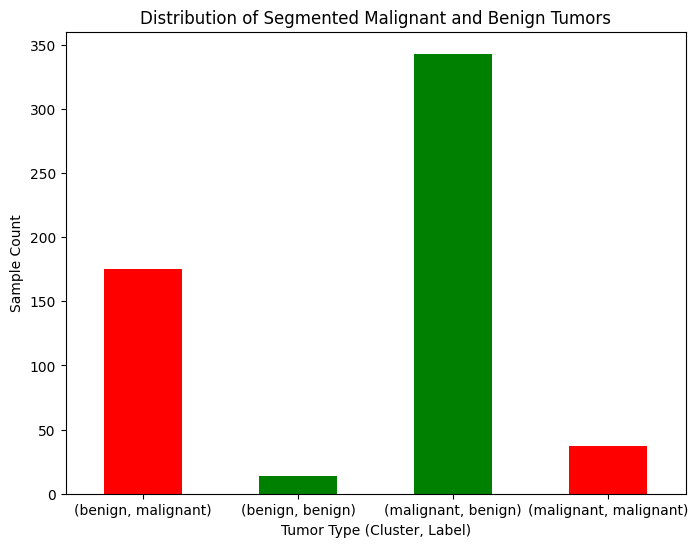

In [110]:
counts = df_with_kmeans_labels.groupby('k-means clusters')['target'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['red', 'green', 'green', 'red'])
plt.xlabel('Tumor Type (Cluster, Label)')
plt.ylabel('Sample Count')
plt.title('Distribution of Segmented Malignant and Benign Tumors')
plt.xticks(rotation=0)
plt.show()

# Visualization of Clusters

This stage is an extension of the Data Visualization section. It has the aim of focusing on Principal Component Analysis (PCA). PCA addresses the challenge of high-dimensional datasets by reducing the number of dimensions while preserving as much of the original variance as possible. It achieves this by transforming the original features into a new set of linear combinations, known as principal components. The first principal component (PC1) captures the direction of greatest variance in the data, while the second principal component (PC2) captures the next highest variance, orthogonal to PC1. By projecting the data onto these principal components, you can reduce a dataset with many features to just a few dimensions, often revealing significant patterns or structures.

It's important to mention that the standardization of features, which involves adjusting them to have a mean of 0 and a standard deviation of 1, is often performed prior to PCA to ensure that the analysis is not biased by the scale of the features.

In [111]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

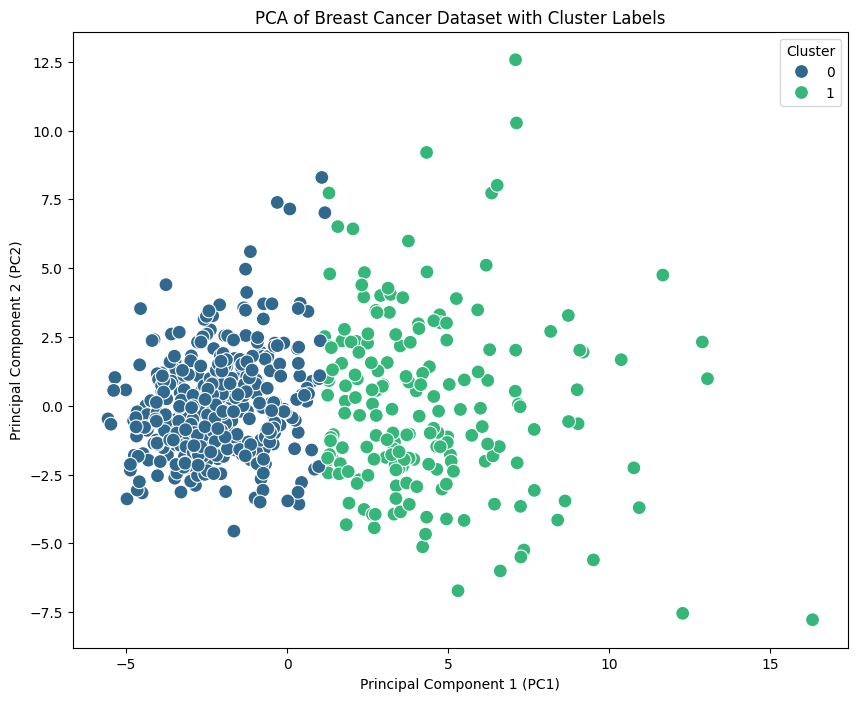

In [112]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

pca_df['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('PCA of Breast Cancer Dataset with Cluster Labels')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.show()

## Principal Component Analysis Coefficients (Loadings)

In this section, I take a closer look at the coefficients (or loadings) from the Principal Component Analysis (PCA) performed in the previous step. The coefficients represent the weights assigned to each feature in the dataset, indicating the contribution of each feature to the principal components. They communicate how each feature influences the principal components and highlight the direction and magnitude of the relationships between features and the components.

In [113]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=breast_cancer.feature_names)
display(loadings)

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


# Evaluation

The next section is the **Evaluation** section. The purpose of this section is the measure the performance of my models.

## Evaluation Metrics

**Adjusted Mutual Information (AMI) Score**

The Adjusted Mutual Information (AMI) score measures the quality of clustering by comparing the similarity between two clusterings while adjusting for chance. It quantifies how much information is shared between the true and predicted clusters, with values ranging from 0 (no mutual information) to 1 (perfect alignment). AMI corrects for random chance and biases, providing a normalized measure of clustering performance.

- Excellent: >0.8
- Good: 0.6 - 0.8
- Moderate: 0.4 - 0.6
- Weak: < 0.4

**Adjusted Rand (ARI) Score**

The Adjusted Rand Index (ARI) score evaluates the agreement between two clusterings by comparing the number of pairs of items that are either clustered together or apart in both clusterings. It adjusts for chance, providing a normalized measure where 1 indicates perfect agreement and 0 means no agreement beyond what would be expected by chance. ARI helps assess clustering quality by accounting for random variations.

- Excellent: >0.8
- Good: 0.6 - 0.8
- Moderate: 0.4 - 0.6
- Weak: <0.4

**Davies-Bouldin Score**

The Davies-Bouldin Score measures the average similarity ratio of each cluster with its most similar cluster, where similarity is defined as the ratio of within-cluster scatter to between-cluster separation. Lower scores indicate better clustering, as they reflect clusters that are more compact and well-separated from each other. It is used to evaluate clustering algorithms by assessing the overall clustering quality.

- Excellent: <1
- Good: 1 - $1.99\bar{9}$
- Fair: 2 - $2.99\bar{9}$
- Poor: ≥3

**Silhouette Score**

The Silhouette Score evaluates the quality of a clustering by measuring how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a score close to 1 indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. A score near 0 suggests that the object is on or very close to the decision boundary between clusters, while negative scores indicate misclassified objects.

- Good: >0.5
- Fair: 0.3 - 0.5
- Poor: <0.3

In [114]:
kmeans_ami = adjusted_mutual_info_score(breast_cancer.target, kmeans_labels)
kmeans_ari = adjusted_rand_score(breast_cancer.target, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(breast_cancer.data, kmeans_labels)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f'K-Means Adjusted Mutual Information (AMI) Score: {round(kmeans_ami, 4)}')
print(f'K-Means Adjusted Rand Index (ARI) Score: {round(kmeans_ari, 4)}')
print(f'K-Means Davies-Bouldin Score: {round(kmeans_davies_bouldin, 4)}')
print(f'K-Means Silhouette Score: {round(kmeans_silhouette, 4)}')

K-Means Adjusted Mutual Information (AMI) Score: 0.554
K-Means Adjusted Rand Index (ARI) Score: 0.6707
K-Means Davies-Bouldin Score: 0.7925
K-Means Silhouette Score: 0.345


## Contingency Table

A contingency table is a tool used to evaluate the quality of clustering results by comparing the clustering output with some known ground truth or reference labels. In many real-world applications, the ground truth is not always available for clustering algorithms, but since it was provided here, then I'll use it to further show the performance of the K-Means Algorithm when attempting to correctly segment the correct classes.

In [115]:
comparison_df = pd.DataFrame({'True Label': breast_cancer.target, 'Cluster Label': kmeans_labels})

contingency_table = pd.crosstab(comparison_df['True Label'], comparison_df['Cluster Label'])
print(contingency_table)

Cluster Label    0    1
True Label             
0               37  175
1              343   14


## Cluster Purity

Cluster purity is a simple and intuitive metric used to evaluate the quality of clustering results by measuring how homogeneous the clusters are with respect to the true class labels. It quantifies how well the clustering algorithm has grouped data points that belong to the same class. Here, I use it as an extension of the Contigency Table, in order to observe a clearer metric, as opposed to simply observing a table.

In [116]:
def calculate_purity(contingency_table):
    return np.sum(np.amax(contingency_table, axis=0)) / np.sum(contingency_table)

purity = calculate_purity(contingency_table.to_numpy())
print(f'Cluster Purity: {purity:.2f}')

Cluster Purity: 0.91


# Results and Analysis

The results indicate that the K-Means algorithm has not effectively aligned the clusters with the actual classes in the dataset. This suggests that K-Means Clustering may not be suitable for separating the data into meaningful clusters in this case. The inherent complexity of the features in the dataset likely hinders the K-Means algorithm's ability to produce clear and accurate clusters corresponding to the true classes.

## Metrics Analysis

- **Adjusted Mutual Information (AMI) Score:** The AMI score measures the agreement between the true class labels and the cluster assignments, adjusted for chance. A score of **0.554** signifies a moderate level of agreement, indicating some relationship between the clusters and the true labels, but not a perfect match.
- **Adjusted Rand Index (ARI) Score:** The ARI score evaluates the clustering's alignment with the true labels, adjusted for chance. With a score of **0.6707**, the clustering solution demonstrates a relatively high degree of agreement, suggesting that the clusters align reasonably well with the true labels.
- **Davies-Bouldin Index:** This index measures the average similarity ratio of each cluster with its most similar cluster. A score of **0.7925** indicates that while the clusters are relatively well-separated, there is some degree of overlap between them.
- **Silhouette Score:** The Silhouette Score assesses how similar a sample is to its own cluster compared to other clusters. A score of **0.345** suggests that the clustering is somewhat reasonable but not optimal, with room for improvement. Higher values closer to 1 would indicate more distinct and well-defined clusters.

## Cluster Purity

- **Purity Score:** The purity score measures the proportion of samples in each cluster that belong to a single true class. A high purity score of **0.91** indicates that the clusters are mostly homogeneous with respect to the true labels. However, the high misclassification rates shown in the contingency table suggest that while clusters are predominantly pure, there is still significant overlap and misclassification.

## Results and Analysis: Summary

Overall, while the K-Means clustering model shows some promise, as indicated by moderate to high AMI and ARI scores and a high purity score, the relatively low Silhouette Score and the high misclassification rates suggest that the clusters are not perfectly aligned with the true classes. The clustering boundaries are not very distinct, and there is considerable overlap between clusters.

To address these limitations, I will compare the results with those from a Gradient Boosting Classifier, which is better suited for classification tasks and may provide a more effective separation of the classes. This comparison will help illustrate the differences between the K-Means Clustering approach and a classification algorithm designed specifically for this type of problem.

# Further Statistical Modeling: Classification Algorithm

As mentioned before, this section is added to illustrate the performance of a model that is specifically designed to classify outcomes (or classes). The Gradient Boosting Machine (GBM) Classifier algorithm is an ensemble learning technique that builds a series of weak learners (typically decision trees) in a sequential manner. Each tree corrects the errors made by the previous ones, resulting in a robust model that combines the predictions of all the trees to make a final classification. This method enhances prediction accuracy and can effectively handle complex datasets by focusing on the most challenging instances.

## Train/Test Split

The train/test split step is performed to divide the dataset into two distinct subsets: a training set and a testing set. This separation allows for training a model on one subset of the data (the training set) and evaluating its performance on an independent subset (the testing set). Previously, this step was not applicable as there was no "ground truth" (hypothetically speaking, the true values were available but I had to treat them as if they didn't exist for the sake of the analysis) to compare against in the unsupervised learning context. However, for this supervised learning phase, it is crucial to split the data into the independent variables (X) and the dependent variable (y) to properly assess the model's ability to predict unseen data.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Statistical Modeling

To demonstrate a robust solution for this type of classification problem, I implemented a Gradient Boosting Machine (GBM) classifier. This algorithm serves to illustrate the contrast between a sub-optimal approach and one that is well-suited for the task at hand. The GBM classifier is particularly effective for this problem due to its ability to handle complex datasets with high-dimensional features. It builds an ensemble of weak learners (usually decision trees) in a sequential manner, where each tree corrects the errors of the previous ones. This iterative process results in a strong predictive model that captures intricate patterns and interactions within the data, making it a superior choice for accurately classifying breast cancer outcomes.

In [118]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [119]:
y_pred = clf.predict(X_test)

## Model Evaluation

In this section, I present the performance metrics of the **Gradient Boosting Machine (GBM) classifier**, which include:
- **Model Accuracy:** The GBM model achieved an accuracy of **0.9649**, indicating **strong overall performance**. 
- **Confusion Matrix:** The confusion matrix reveals that **out of 114 samples**, **the model correctly classified 45 benign (class 0) and 65 malignant (class 1) samples**, with **2 false positives** and **2 false negatives**.
- **Classification Report:** The classification report shows that the precision for benign samples is **0.97**, and for malignant samples, it is **0.96**. The recall for benign samples is **0.97**, and for malignant samples, it is **0.96**, resulting in a high f1-score of **0.97** for benign and **0.96** for malignant cases.

When classifying tumor samples, false negatives (i.e., failing to identify a malignant tumor) are generally more critical than false positives because missing a malignant tumor can lead to serious health risks for the patient. Hence, while minimizing false positives is important to avoid unnecessary worry, reducing false negatives is crucial to ensure that malignant tumors are detected and treated promptly.

In [120]:
clf_score = clf.score(X_test, y_test)
print(f'Gradient Boosting Machine (GBM) Accuracy: {round(clf_score, 4)}')

confusion_matrix_clf = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix_clf)
display(confusion_matrix_df)

print(classification_report(y_test, y_pred))

Gradient Boosting Machine (GBM) Accuracy: 0.9649


,0,1
0,45,2
1,2,65


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## Get Feature Importances (Sorted)

With an effective classification model in place, it's essential to understand which features contribute most significantly to the classification results. This section presents the feature importances as determined by the Gradient Boosting Machine (GBM) classifier. Feature importances are metrics that indicate the relevance of each feature in making accurate predictions. The features are sorted from highest to lowest importance, providing insight into which variables have the greatest impact on distinguishing between classes. By analyzing these importances, we can better understand the underlying factors driving the classification outcomes.

In [121]:
feature_importances = pd.DataFrame(clf.feature_importances_, index=feature_names, columns=['Feature Importances'])

sorted_importances = feature_importances.sort_values(by='Feature Importances', ascending=False)
display(sorted_importances)

,Feature Importances
worst concave points,0.410761
mean concave points,0.279819
worst area,0.096048
worst perimeter,0.063474
worst texture,0.025981
area error,0.023784
mean texture,0.018533
worst radius,0.015358
worst concavity,0.015312
mean smoothness,0.011233


# Final Analysis & Conclusion

The K-Means Clustering algorithm, while useful for exploring unsupervised learning, did not effectively segment the breast cancer samples into the correct classes of malignant and benign. This suggests that feature similarity alone is not a sufficient indicator for class prediction in this context, highlighting the limitations of clustering techniques for this particular problem. In contrast, the Gradient Boosting Machine (GBM) Classifier demonstrated a significantly better performance, achieving high accuracy and robust classification metrics. This indicates that the GBM model, with its ability to capture complex patterns and interactions in the data, is far more effective for predicting breast cancer outcomes compared to unsupervised clustering methods. It is important to note that this does not necessarily imply that clustering models are inferior overall; rather, they may not be the most suitable for every type of problem. I hope this analysis provides valuable insights into the strengths and limitations of different machine learning approaches in the context of breast cancer diagnosis.

Thank you for reviewing this work, and I extend my heartfelt gratitude to the researchers and medical professionals dedicated to advancing the fight against breast cancer. May their tireless work and commitment soon lead us to a cure.